In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bangkokDF = pd.read_csv('Raw/bangkok df.csv')
koPhanganDF = pd.read_csv('Raw/Ko Pha-ngan df.csv')
koPhiPhiDF = pd.read_csv('Raw/Ko Phi Phi df.csv')
kohSamuiDF = pd.read_csv('Raw/Koh Samui df.csv')
phuketDF = pd.read_csv('Raw/Phuket df.csv')

bangkokDF['Origin'] = 'Bangkok'
koPhanganDF['Origin'] = 'Ko Pha-ngan'
koPhiPhiDF['Origin'] = 'Ko Phi Phi'
kohSamuiDF['Origin'] = 'Koh Samui'
phuketDF['Origin'] = 'Phuket'

In [3]:
df = pd.concat([bangkokDF,
                koPhanganDF,
                koPhiPhiDF,
                kohSamuiDF,
                phuketDF],
               ignore_index=True)
df.shape


(7956, 33)

<AxesSubplot:>

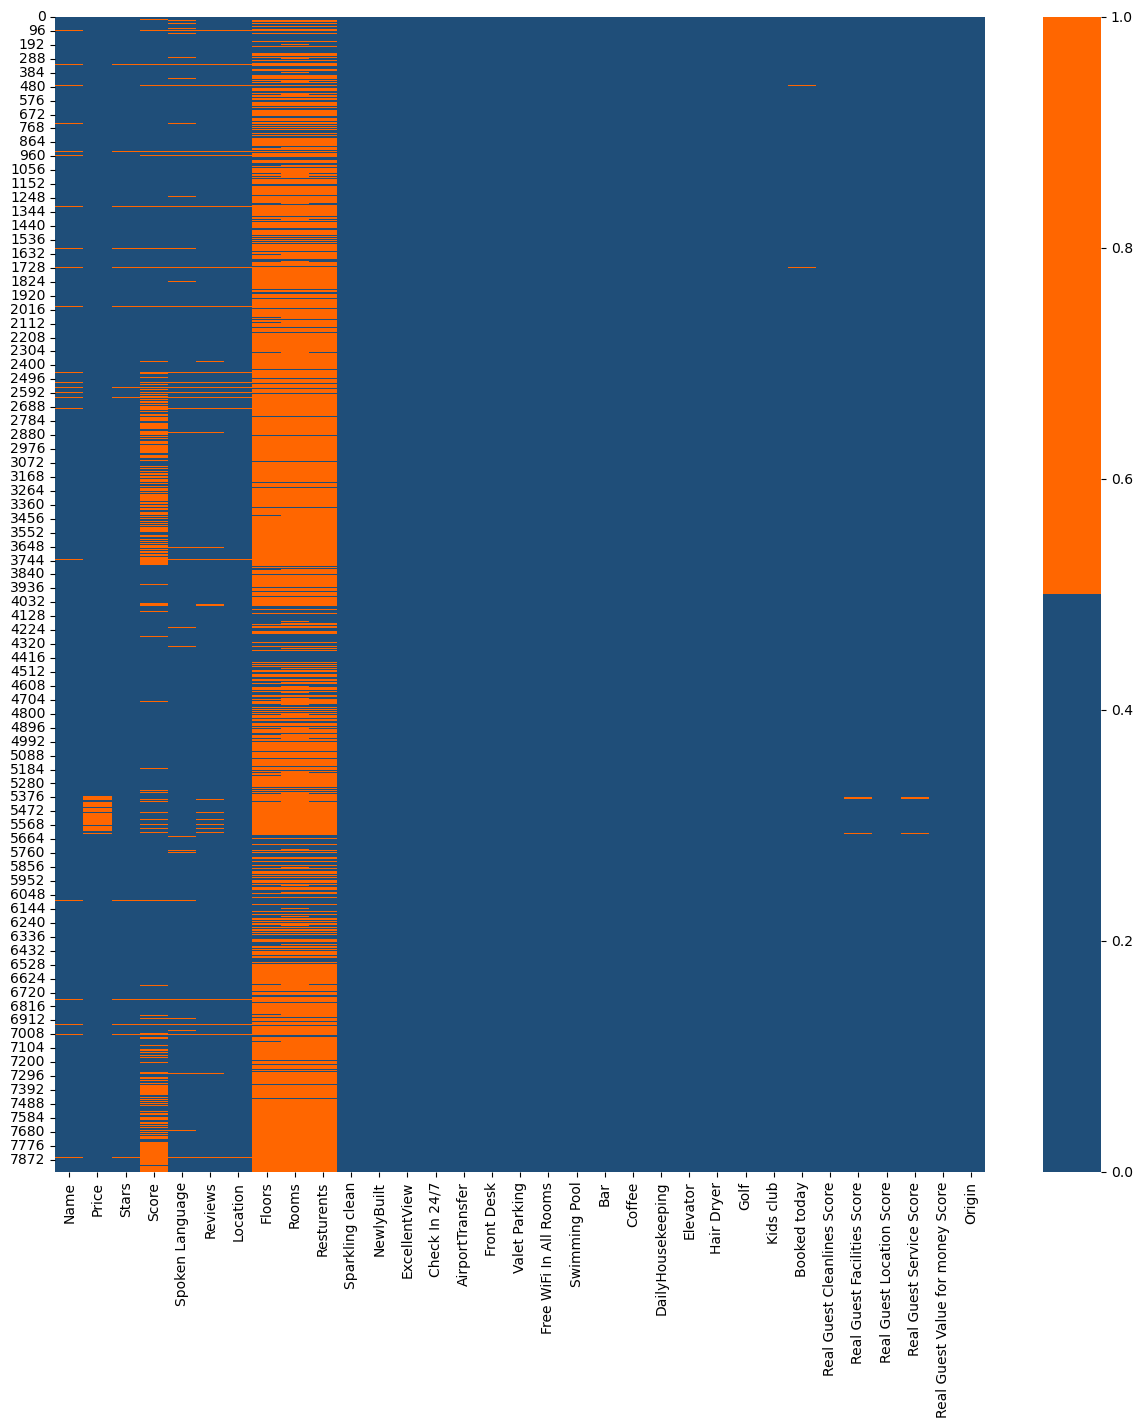

In [4]:
colors = ['#1F4e79', '#FF6600']
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

### Conclusion 1:
Most of the FRR (Floors, Rooms, Resturents) data couldn't be extracted.<br>
At the begning i had 2 hypotheses:

Hypothesis A: the amonut of FRR is *1* so the property owener didn't see any nessecary to update the AGODA about it.
<br>
This Hypothesis have been disqualified due to cupple random hotels images check.<br>
1. 12/14 hotels had images of a buildding with more then 4 floors.
2. 4/14 hotels that have been check was villas and mention they has 12 rooms.
3. 3/14 hotels doesn't mantion they had resurent and in the images it seems the opposite.

Hypothesis B: AGODA is a web that well known for being scraped, even during building my scrapper code it changed some of his web element title (to make it difficult for programmers). <br>So my best guess is that some element has different name in differnt hotal page

Due to the above i decided to remove these columns

In [5]:
print(f"Floors has {df.Floors.isnull().sum()/df.shape[0]*100:.2f}% nulls")
print(f"Rooms has {df.Rooms.isnull().sum()/df.shape[0]*100:.2f}% nulls")
print(f"Resturents has {df.Resturents.isnull().sum()/df.shape[0]*100:.2f}% nulls")

Floors has 72.78% nulls
Rooms has 76.38% nulls
Resturents has 74.20% nulls


In [6]:
df.drop(columns=['Floors', 'Rooms', 'Resturents'], inplace=True)

### Conclusion 2:
we can split the data to 2 parts:
1. Left side (from to first columns till 'Location') where it seems we need to do some cleaning.
2. Right side (from sparkling clean till the end) where it seems most of the data is OK.

In the lef side we can see some row with multiple featurs missing, we whould like to drop them cause most of their data is missing so there must be some problem with this spacific hotel

In [7]:
# We will leave only rows with maximum 2 value's missing
df.dropna(thresh=(len(df.columns)) - 2, inplace=True)

<AxesSubplot:>

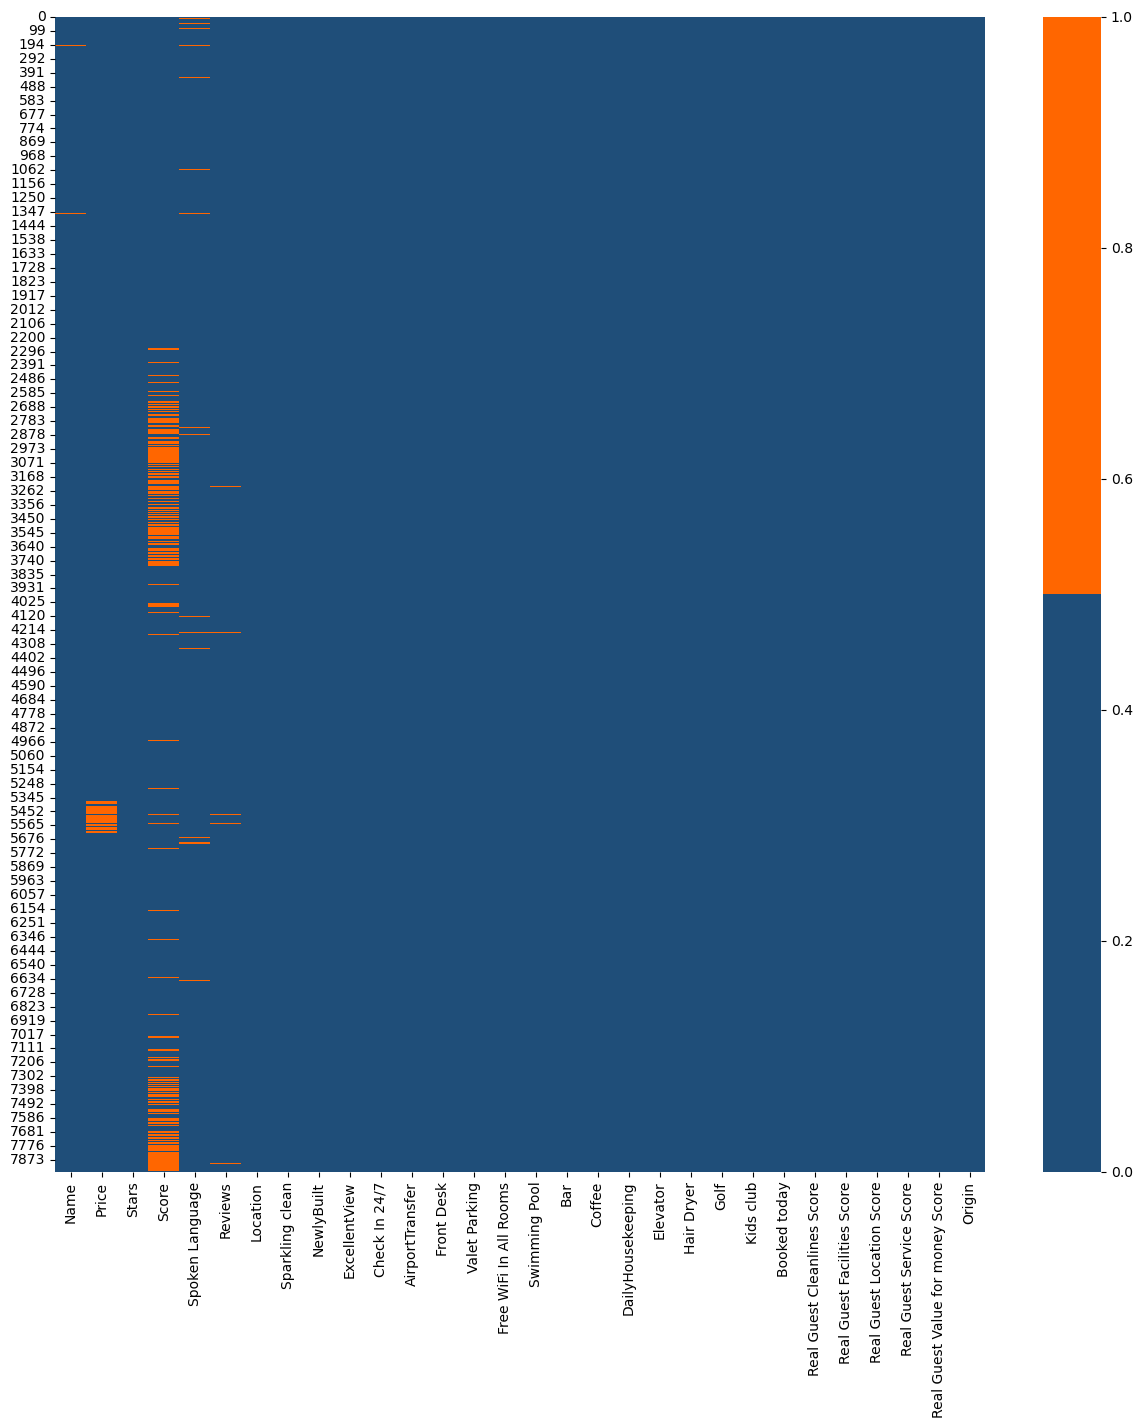

In [8]:
colors = ['#1F4e79', '#FF6600']
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors))

In [9]:
# Now we can start inspect each columns separately
df.isnull().sum()

Name                                   9
Price                                171
Stars                                  0
Score                               1371
Spoken Language                      100
Reviews                               34
Location                               0
Sparkling clean                        0
NewlyBuilt                             0
ExcellentView                          0
Check In 24/7                          0
AirportTransfer                        0
Front Desk                             0
Valet Parking                          0
Free WiFi In All Rooms                 0
Swimming Pool                          0
Bar                                    0
Coffee                                 0
DailyHousekeeping                      0
Elevator                               0
Hair Dryer                             0
Golf                                   0
Kids club                              0
Booked today                           0
Real Guest Clean

# Handle columns null
The columns we nead to pay attintions are: Name, Price, Score, Spoken Language, Reviews, Real Guest Facilities Score, Real Guest Service Score

### Name

In [10]:
# Name columns hase only 9 missing value, Let's watch them
df[df.Name.isnull()]

,Name,Price,Stars,Score,Spoken Language,Reviews,Location,Sparkling clean,NewlyBuilt,ExcellentView,...,Hair Dryer,Golf,Kids club,Booked today,Real Guest Cleanlines Score,Real Guest Facilities Score,Real Guest Location Score,Real Guest Service Score,Real Guest Value for money Score,Origin
198,NaN,JMI,4 star,"8.0\nExcellent\n3,121 reviews",NaN,"3,121 reviews","219 Soi Charansanitwong 66/1, Charansanitwong ...",False,False,True,...,False,False,False,51.0,8.2,8.0,8.0,6.9,8.0,Bangkok
270,NaN,JMI,5 star,"9.2\nExceptional\n3,672 reviews","English, Japanese, Korean, Thai","3,672 reviews","250 Sukhumvit Road, Sukhumvit, Bangkok, Thaila...",True,False,False,...,False,False,False,25.0,9.4,9.4,9.6,9.1,9.4,Bangkok
734,NaN,JMI,4 star,"8.9\nExcellent\n1,131 reviews",NaN,"1,131 reviews","10 Rachataphan, Ratchaprarop Makkasan, Ratchat...",True,False,False,...,False,False,False,13.0,9.2,8.8,8.8,9.3,9.1,Bangkok
1358,NaN,JMI,4 star,8.2\nExcellent\n499 reviews,NaN,499 reviews,"222 Thanon Pradiphatm, Phayathai, Chatuchak, B...",False,False,False,...,False,False,False,0.0,8.5,8.1,8.5,8.5,8.7,Bangkok
4010,NaN,JMI,2.5 star,"7.9\nVery good\n1,087 reviews","English, Thai","1,087 reviews","194/1 M.7 Tambol Ao-Nang, Amphur Maung, Ton Sa...",False,False,False,...,False,False,False,0.0,8.1,6.8,8.5,7.7,7.7,Ko Phi Phi
5843,NaN,JMI,2 star,NaN,English,147 reviews,"78/1 Phangmuang Sai Kor rd. Patong Katu, Paton...",True,False,False,...,False,False,False,0.0,9.0,8.4,8.5,8.9,8.9,Phuket
6909,NaN,JMI,2 star,NaN,"English, Thai",30 reviews,"369/59 Yowarat Rd. Talad Yai, Phuket Town, Phu...",False,False,False,...,False,False,False,0.0,8.8,7.5,9.1,8.0,8.6,Phuket
7136,NaN,JMI,4 star,9.7\nExceptional\n14 reviews,"Dishes and dining utensils, Kitchen basics (co...",14 reviews,"Karon, Phuket, Thailand",True,False,False,...,False,False,False,0.0,10.0,10.0,10.0,10.0,10.0,Phuket
7576,NaN,JMI,0 star,8.7\nExcellent\n2 reviews,"English, Thai",2 reviews,"Karon, Phuket, Thailand",False,False,False,...,False,False,False,0.0,8.8,10.0,10.0,6.3,10.0,Phuket


In [11]:
# We can see that part of the data is unusable ('Price' JMI, some NA in 'Spoken Language',
# most of the True False columns are False we can conclude thet this page we dammeged 
# (or it's a vary lame hotel)) and the data is distrabuted evenly in Origin 
# so i decided to drop this rows.
df.dropna(subset=['Name'], inplace=True)

### Price

In [12]:
# JMI is top freq value, it stand for Just Missed It.
# Some times Agoda show us a spaciel price then relevent for finite periode of time.
# When this time reach for his limit the 'Spaciel Price' text change to 'Just Missed It'
df.Price.value_counts()

JMI      743
79       148
69       136
99       123
89       122
        ... 
330        1
488        1
1,033      1
518        1
843        1
Name: Price, Length: 783, dtype: int64

In [13]:
# In my opinion, the proper way to handle this kind of data isn't just to drop it.
# We also can't just fillna with the median/mean or mode, we should split it evenly across
# the data without change the data distrabution
df.Price = df.Price.replace('JMI', np.nan)
df.Price = df.Price.str.replace(',', '')

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

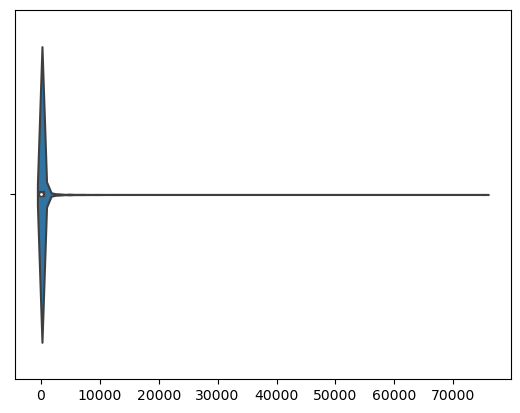

In [14]:
# when try to find the current distrabution we found some outliers
notNullPriceValue = df[df.Price.notnull()]['Price'].astype(np.int32).values
sns.violinplot(notNullPriceValue)

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

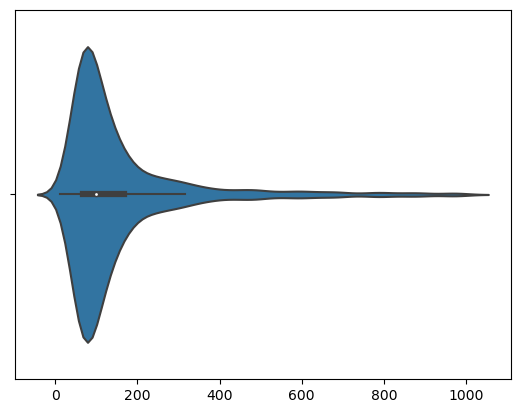

In [15]:
# First of all we will remove them
notNullPriceValue = df[df.Price.notnull()]['Price'].astype(np.int32).values
notNullPriceValue1000 = notNullPriceValue[notNullPriceValue < 1000]
sns.violinplot(notNullPriceValue1000)

In [16]:
# Best way is the use numpy random method
df.Price = df.Price.apply(lambda x: np.random.choice(df.Price.dropna()) if pd.isnull(x) else x)

C:\Users\97254\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

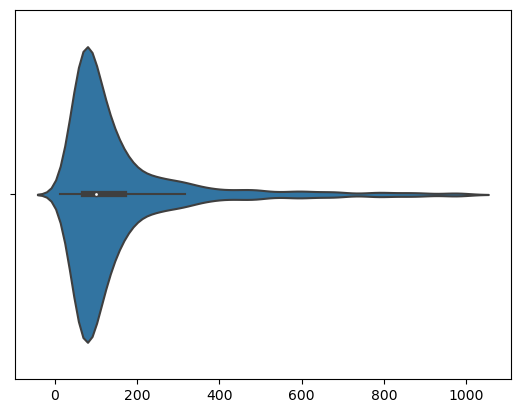

In [17]:
# finally we will actully remove the outliers from our DF
df.Price = df.Price.astype(np.int32)
df = df[df.Price < 1000]
# and verify that the distrabution stay the same
sns.violinplot(df.Price.values)

### Score

In [18]:
# Score columns conatin a sring that made from numerical Score, Verbel Score and review.
# Almost 16% of the data here is null so we wouldn't like to drop it
df.Score.isnull().sum()
df


,Name,Price,Stars,Score,Spoken Language,Reviews,Location,Sparkling clean,NewlyBuilt,ExcellentView,...,Hair Dryer,Golf,Kids club,Booked today,Real Guest Cleanlines Score,Real Guest Facilities Score,Real Guest Location Score,Real Guest Service Score,Real Guest Value for money Score,Origin
0,Asia Hotel Bangkok (SHA Plus+),119,4 star,"7.9\nVery good\n27,771 reviews","English, Thai","27,771 reviews","296 Phayathai Road, Siam, Bangkok, Thailand, 1...",False,False,True,...,False,False,False,176.0,7.6,7.5,9.1,7.5,7.6,Bangkok
1,Rembrandt Hotel & Suites (SHA Plus+),493,4.5 star,"8.3\nExcellent\n6,001 reviews",NaN,"6,001 reviews","19 Sukhumvit Soi 18, Klong Toei, Sukhumvit, Ba...",False,False,True,...,False,False,False,32.0,8.5,8.1,8.4,8.3,8.6,Bangkok
2,Dream Hotel Bangkok (SHA Plus+),118,4.5 star,"8.4\nExcellent\n16,109 reviews",NaN,"16,109 reviews","10 Sukhumvit Soi 15, Sukhumvit, Bangkok, Thail...",False,False,False,...,False,True,False,31.0,8.8,8.1,8.5,8.4,8.7,Bangkok
3,VIX Bangkok @ Victory Monument,104,3 star,"9.2\nExceptional\n1,439 reviews","English, Chinese [Mandarin], Thai","1,439 reviews","13-15 Thanon Ratchawithi, Chatuchak, Bangkok, ...",True,False,False,...,False,False,False,24.0,9.3,9.0,9.5,9.4,9.3,Bangkok
4,The Berkeley Hotel Pratunam (SHA Plus+),238,5 star,"8.2\nExcellent\n61,617 reviews","English, Chinese [Mandarin], Thai","61,617 reviews","559 Ratchathewi, Pratunam, Bangkok, Thailand, ...",False,False,False,...,False,False,False,128.0,8.3,8.1,8.8,8.2,8.1,Bangkok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7949,The Beach by Glitter House,166,3 star,9.5\nExceptional\n40 reviews,"English, Thai",40 reviews,"110/54 Kata Road, Kata, Phuket, Thailand, 83100",True,False,False,...,False,False,False,0.0,9.4,9.6,9.4,9.5,9.4,Phuket
7951,Westkey Kamala villa,843,5 star,9.5\nExceptional\n3 reviews,"English, Thai",3 reviews,"Kamala, Phuket, Thailand",True,False,False,...,False,False,False,0.0,9.3,9.3,9.3,10.0,9.3,Phuket
7952,Bcollection Resort,198,5 star,9.6\nExceptional\n1 review,"English, Thai",1 review,"Layan, Phuket, Thailand",True,False,False,...,False,False,False,0.0,10.0,8.0,10.0,10.0,10.0,Phuket
7953,"Private Room, No Window, Patong Beach",99,3 star,NaN,Chinese [Mandarin],Clear all,"Patong, Phuket, Thailand",False,False,False,...,False,False,False,0.0,False,False,False,False,False,Phuket


In [19]:
# We will save only the numerical score (verbal Score isn't nessecarry and we have reviews 
# in another columns) and do the same as we do in Price fillna with random
# df.Score = df.Score.apply(lambda x: float(x.split('\n')[0]) if not pd.isnull(x) else x)
# df.Score = df.Score.apply(lambda x: np.random.choice(df.Score.dropna()) if pd.isnull(x) else x)
#shay
df['Score'] = df['Score'].apply(lambda x: pd.to_numeric(str(x).split('\n')[0], errors='coerce'))

# Remove rows with non-numeric values in the "Score" column
df = df[pd.notnull(df['Score'])]

# Print the remaining number of rows
print("Remaining rows:", len(df))




Remaining rows: 6268


### shay score to class

### Spoken Language

In [20]:
df = df.rename(columns={'Spoken Language': 'SpokenLanguages'})

In [21]:
# There are 92 hotel with NA value, we will fill them with he most common value per Origin
df.SpokenLanguages.isnull().sum()

90

In [22]:
Bangkok_MCL = df[df.Origin == 'Bangkok'].SpokenLanguages.value_counts().idxmax()
Ko_Phangan_MCL = df[df.Origin == 'Ko Pha-ngan'].SpokenLanguages.value_counts().idxmax()
Ko_PhiPhi_MCL = df[df.Origin == 'Ko Phi Phi'].SpokenLanguages.value_counts().idxmax()
Koh_Samui_MCL = df[df.Origin == 'Koh Samui'].SpokenLanguages.value_counts().idxmax()
Phuket_MCL = df[df.Origin == 'Phuket'].SpokenLanguages.value_counts().idxmax()

In [23]:
df.loc[(df.SpokenLanguages.isna()) & (df.Origin == 'Bangkok'), 'SpokenLanguages'] = Bangkok_MCL
df.loc[(df.SpokenLanguages.isna()) & (df.Origin == 'Ko Pha-ngan'), 'SpokenLanguages'] = Ko_Phangan_MCL
df.loc[(df.SpokenLanguages.isna()) & (df.Origin == 'Ko Phi Phi'), 'SpokenLanguages'] = Ko_PhiPhi_MCL
df.loc[(df.SpokenLanguages.isna()) & (df.Origin == 'Koh Samui'), 'SpokenLanguages'] = Koh_Samui_MCL
df.loc[(df.SpokenLanguages.isna()) & (df.Origin == 'Phuket'), 'SpokenLanguages'] = Phuket_MCL

### Reviews

In [24]:
# same as before we have here some unknown value 'clear all' we will reffer him as na
df.Reviews = df.Reviews.replace('Clear all', np.nan)
df.Reviews.isnull().sum()

5

In [25]:
df.Reviews.value_counts()

1 review         240
2 reviews        167
3 reviews        101
4 reviews         73
5 reviews         72
                ... 
2,977 reviews      1
1,357 reviews      1
1,418 reviews      1
988 reviews        1
1,446 reviews      1
Name: Reviews, Length: 1775, dtype: int64

In [26]:
df.Reviews = df.Reviews.str.replace('reviews', '')
df.Reviews = df.Reviews.str.replace('review', '')
df.Reviews = df.Reviews.str.replace(',', '')

df = df[~df['Reviews'].str.contains('third party', na=False)]

notNullReviewsValue = df[df.Reviews.notnull()].Reviews.astype(np.int32).values

In [27]:
notNullReviewsValue

array([27771,  6001, 16109, ...,    40,     3,     1])

In [28]:
df.Reviews = df.Reviews.apply(lambda x: np.random.choice(notNullReviewsValue) if pd.isnull(x) else x)
df.Reviews = df.Reviews.astype(np.int32)

### Real Guest Facilities-Score/Service-Score

In [29]:
# there is only one line missing these values
print(df['Real Guest Facilities Score'].isnull().sum())
print(df['Real Guest Service Score'].isnull().sum())

1
1


In [30]:
df.dropna(subset=['Real Guest Facilities Score'], inplace=True)

# Cast data type

In [31]:
# columns thet need treatment: stars, Real Guest, all the boolian
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 7952
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              6172 non-null   object 
 1   Price                             6172 non-null   int32  
 2   Stars                             6172 non-null   object 
 3   Score                             6172 non-null   float64
 4   SpokenLanguages                   6172 non-null   object 
 5   Reviews                           6172 non-null   int32  
 6   Location                          6172 non-null   object 
 7   Sparkling clean                   6172 non-null   bool   
 8   NewlyBuilt                        6172 non-null   bool   
 9   ExcellentView                     6172 non-null   bool   
 10  Check In 24/7                     6172 non-null   bool   
 11  AirportTransfer                   6172 non-null   bool   
 12  Front 

In [32]:
df.Stars = df.Stars.str.replace(' star', '')
df.Stars = df.Stars.astype(np.float64)

In [33]:
columns_to_convert = ['Real Guest ' + parm + ' Score' for parm in ['Cleanlines',
                                                                   'Facilities',
                                                                   'Location',
                                                                   'Service',
                                                                   'Value for money']]
for column in columns_to_convert:
    df = df[df[column] != 'False']
    df[column] = df[column].astype(np.float64)

In [34]:
columns_to_convert = ['Sparkling clean',
                      'NewlyBuilt',
                      'ExcellentView',
                      'Check In 24/7', 
                      'AirportTransfer',
                      'Front Desk',
                      'Valet Parking',
                      'Free WiFi In All Rooms', 
                      'Swimming Pool',
                      'Bar', 'Coffee',
                      'DailyHousekeeping',
                      'Elevator', 
                      'Hair Dryer',
                      'Golf',
                      'Kids club']
for column in columns_to_convert:
    df[column] = df[column].astype(np.int32)

# Duplicates

In [35]:
df.duplicated().sum()

974

In [36]:
df.drop_duplicates(inplace=True, ignore_index=True)

# Save result

In [37]:
# These columns aren't usful
print(df['Hair Dryer'].value_counts())
print(df['Elevator'].value_counts())
df.drop(columns=['Elevator', 'Hair Dryer'], inplace=True)



0    5143
Name: Hair Dryer, dtype: int64
0    5143
Name: Elevator, dtype: int64


In [38]:
values2Remove = ['Free Wi-Fi in all rooms!, Internet','Refrigerator','Internet, Wi-Fi in public areas','Microwave, Refrigerator','Cable channels, Internet, TV, Wi-Fi','Dishes and dining utensils, Microwave, Refrigerator','TV, Wi-Fi','Body wash','Internet, TV, Wi-Fi','Cable channels, TV, Wi-Fi','Dishes and dining utensils, Kitchen basics (cookware, oils, condiments), Microwave, Refrigerator, Stove','Dishes and dining utensils, Microwave, Refrigerator, Stove','Wheelchair accessible','Wi-Fi','Balcony or terrace','Microwave, Refrigerator, Stove','Internet, Wi-Fi','Free Wi-Fi in all rooms!, Internet, Wi-Fi in public areas','Cable channels, TV','Microwave','Kitchen basics (cookware, oils, condiments)','Dishes and dining utensils, Microwave','Dishes and dining utensils, Freezer, Kitchen basics (cookware, oils, condiments), Microwave, Refrigerator, Stove','Dishes and dining utensils, Refrigerator','Freezer, Refrigerator','Dishes and dining utensils, Kitchen basics (cookware, oils, condiments), Refrigerator','Kitchen basics (cookware, oils, condiments), Microwave, Refrigerator, Stove','Wi-Fi in public areas','Laundromat nearby','Dishes and dining utensils, Freezer, Kitchen basics (cookware, oils, condiments), Microwave, Oven, Refrigerator, Stove','Paid parking','Microwave, Oven, Refrigerator, Stove','Dishes and dining utensils, Dishwasher, Freezer, Kitchen basics (cookware, oils, condiments), Microwave, Refrigerator, Stove','Dishes and dining utensils, Kitchen basics (cookware, oils, condiments), Microwave, Oven, Refrigerator, Stove','Internet [LAN]','Free Wi-Fi in all rooms!, Internet, Internet [LAN], Internet services, Wi-Fi in public areas','Cable channels','Dishes and dining utensils, Freezer, Microwave, Refrigerator, Stove','Freezer','TV','Dishes and dining utensils, Kitchen basics (cookware, oils, condiments)','Kitchen basics (cookware, oils, condiments), Microwave, Refrigerator','Dishes and dining utensils, Freezer, Microwave, Refrigerator','Internet','Free Wi-Fi in all rooms!, Internet, Internet services, Wi-Fi in public areas','Bathtub, Body wash','Cleaned following Agoda or health guidelines, Cleaning products used based on health guidelines, Cleaning supplies provided for guests, Contactless check-in/check-out, Disinfected following Agoda or health guidelines, Face masks provided for guests, Hand sanitizer and soap provided']
df = df[~df.SpokenLanguages.isin(values2Remove)]

In [39]:
df.to_csv("Raw/Final_CSV.csv", index=False, encoding='utf-8')
df.shape

(4829, 28)